In this notebook we develop the burn-in function, which uses the blobdetector to find blobs and then find the right number of flies and the initial position.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from flytracker.utils import FourArenasQRCodeMask

In [7]:
def default_blob_detector_params():
    # Setup SimpleBlobDetector parameters.
    params = cv.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 20
    params.maxThreshold = 150

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 15
    params.maxArea = 60
    params.minDistBetweenBlobs = 1.0

    # Turn off other filters
    params.filterByCircularity = False
    params.filterByConvexity = False
    params.filterByInertia = False

    return params

In [12]:
path = '../../data/movies/4arenas_QR.h264'

blob_detector = cv.SimpleBlobDetector_create(default_blob_detector_params())
capture = cv.VideoCapture(path)
mask = FourArenasQRCodeMask().mask

In [26]:
image = cv.cvtColor(capture.read()[1], cv.COLOR_BGR2GRAY)

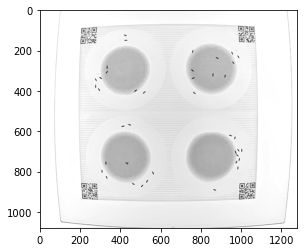

In [27]:
plt.imshow(image, cmap='gray')

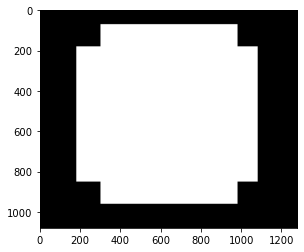

In [45]:
plt.imshow(mask, cmap='gray')

In [42]:
%%time
keypoints = blob_detector.detect(image * mask)  # get keypoints
print(len(keypoints))

40
CPU times: user 182 ms, sys: 77.3 ms, total: 260 ms
Wall time: 9.68 ms


In [43]:
locs = np.array([keypoint.pt for keypoint in keypoints])

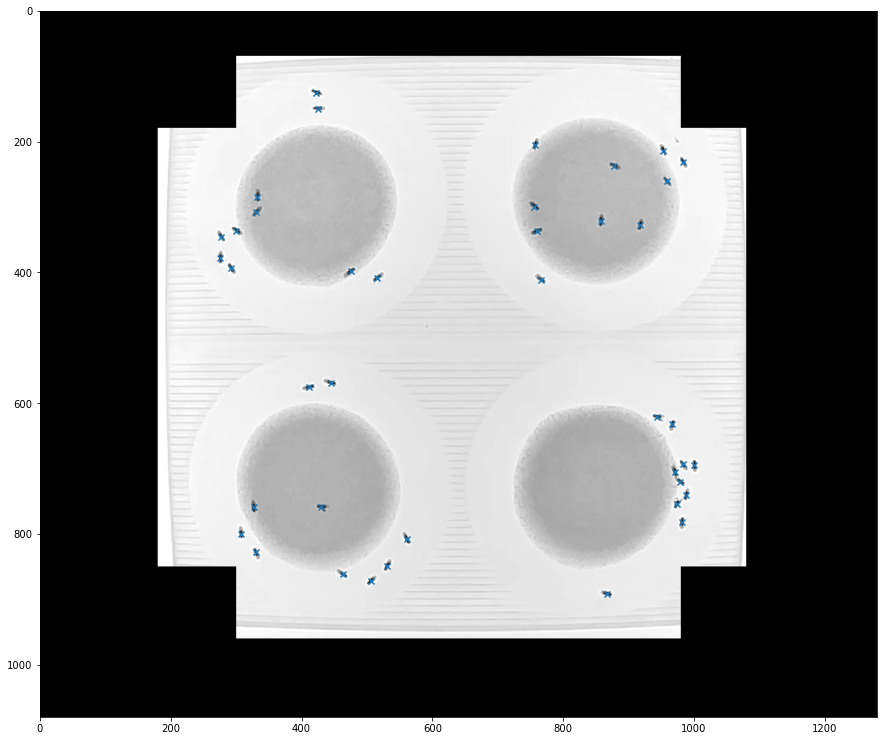

In [44]:
plt.figure(figsize=(15, 15))
plt.scatter(locs[:, 0], locs[:, 1], marker='x')
plt.imshow(mask * image, cmap='gray')

In [35]:
locs.shape

(40, 2)

In [ ]:
  # Run blob detector at the first n_frames to get number of flies and initial position

        
        locations = []
        for frame_idx in np.arange(n_ini_frames):
            # Load as grayscale, apply mask, f
            
            
            keypoints = blob_detector.detect(image)  # get keypoints
            print(len(keypoints))
            locations.append([keypoint.pt for keypoint in keypoints])  # extract coordinates from keypoints

        n_flies = [len(frame) for frame in locations]
        print(n_flies)

In [46]:
n_frames = 5
n_batch = 100

In [47]:
0 % n_batch

0

16.0

In [53]:
(1000 - 2 * 60) 

880